# Première implementation des modèles

Ce notebook est fait pour faire des tests sur l'implémentation des modèles, de la génération des données, des graphiques, etc.

In [1]:
%load_ext autoreload
%autoreload 2

In [195]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as nprd

import smc_movement_models.data_generator as dg
import smc_movement_models.graph_values as gv

In [196]:
ts = dg.generate_ts(num=5000)
a1s, a2s, ses, s0s = dg.interpolate_graphs(ts)
yt, et, xt, nt = dg.generate_x_tilde(ts, ses, s0s, sv=1e-4, seed=2)

/home/gwatk/Documents/ENSAE/HMM/movement_models/smc_movement_models/data_generator.py:57: RuntimeWarning: overflow encountered in matmul
  [1, 0, 0, 0],
/home/gwatk/Documents/ENSAE/HMM/movement_models/smc_movement_models/data_generator.py:57: RuntimeWarning: invalid value encountered in matmul
  [1, 0, 0, 0],


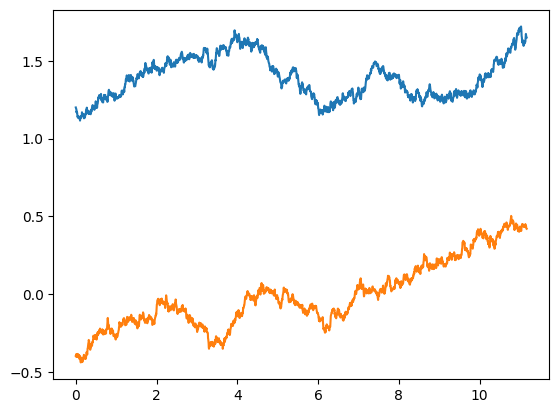

In [191]:
plt.plot(ts, xt[:, 2])
plt.plot(ts, xt[:, 3])

In [76]:
a1 = {
    0: 1.2,
    1: 1.5,
    5: 1.5,
    6: 1.2,
    8: 1,
    9: 0,
    11: 0,
    11.5: 0,
    12: 0.25,
    12.5: 0.1,
    14: 0.9,
    15: 0.8,
    16: 0.9,
    18: 0,
    19.5: 0,
    20: -0.1,
    21: 0.25,
    23: 0,
    24: 0.85,
}

a2 = {
    0: -0.4,
    1: -0.6,
    3: -0.55,
    4: -0.6,
    6: -0.6,
    7: -0.3,
    8: -0.2,
    9: 0.05,
    9.5: -0.05,
    10: 0,
    12: 0,
    12.5: 0.15,
    13: 0.05,
    15: 0.2,
    16: 0.1,
    16.5: 0.2,
    18: -0.05,
    19: 0,
    20: 0.1,
    22: 0.15,
    23: 0,
    24: 0.15,
}

se = {
    0: 0.18,
    0.5: 0.17,
    1: 0.14,
    2: 0.18,
    2.5: 0.15,
    3: 0.17,
    3.5: 0.15,
    4: 0.195,
    4.5: 0.15,
    5: 0.195,
    5.5: 0.155,
    6: 0.175,
    6.5: 0.125,
    7: 0.1,
    8: 0.04,
    9: 0.095,
    10: 0.03,
    12: 0.03,
    12.5: 0.045,
    13: 0.03,
    14.2: 0.03,
    15: 0.05,
    15.5: 0.03,
    16: 0.1,
    16.5: 0.11,
    17: 0.03,
    24: 0.03,
}

s0 = {
    0: 0.06,
    0.5: 0.05,
    1: 0.05,
    1.5: 0.035,
    2: 0.035,
    2.5: 0.06,
    3: 0.025,
    3.5: 0.045,
    3.7: 0.03,
    4: 0.05,
    4.5: 0.03,
    5: 0.06,
    5.5: 0.05,
    6: 0.07,
    6.5: 0.05,
    8: 0.0015,
    9: 0.045,
    9.5: 0.01,
    10: 0.01,
    11: 0.01,
    12: 0.015,
    12.5: 0.025,
    13: 0.015,
    14: 0.016,
    14.5: 0.0155,
    15: 0.025,
    15.5: 0.015,
    16.2: 0.04,
    17: 0.005,
    20: 0.0045,
    21: 0.0055,
    23: 0.0045,
    24: 0.01,
}

sv = 0.1

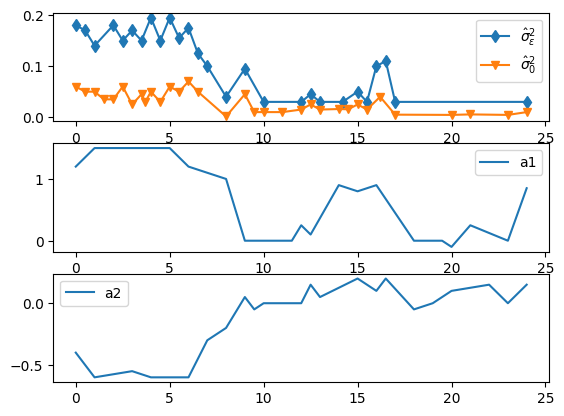

In [161]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.plot(gv.se.keys(), gv.se.values(), marker="d", label=r"$\hat{\sigma}_{\varepsilon}^2$")
ax1.plot(gv.s0.keys(), gv.s0.values(), marker="v", label=r"$\hat{\sigma}_{0}^2$")
ax2.plot(gv.a1.keys(), gv.a1.values(), label="a1")
ax3.plot(gv.a2.keys(), gv.a2.values(), label="a2")
ax1.legend()
ax2.legend()
ax3.legend()

In [86]:
list(a1.keys())

[0, 1, 5, 6, 8, 9, 11, 11.5, 12, 12.5, 14, 15, 16, 18, 19.5, 20, 21, 23, 24]

In [180]:
ts = np.arange(0, 24.01, 0.005)
a1s = np.interp(x=ts, xp=list(a1.keys()), fp=list(a1.values()))
a2s = np.interp(x=ts, xp=list(a2.keys()), fp=list(a2.values()))
ses = np.interp(x=ts, xp=list(se.keys()), fp=list(se.values()))
s0s = np.interp(x=ts, xp=list(s0.keys()), fp=list(s0.values()))

In [207]:
c1 = 0.9
c2 = 0.1
delta = 10
n = len(ts)
epst = c1 * np.random.normal(loc=0, scale=np.sqrt(ses)) + c2 * np.random.normal(
    loc=0, scale=delta * np.sqrt(ses)
)
nu1t = np.random.normal(loc=0, scale=np.sqrt(sv), size=n)
nu2t = np.random.normal(loc=0, scale=np.sqrt(sv), size=n)
nt = np.vstack((epst, np.zeros_like(ts), nu1t, nu2t)).T

In [181]:
nprd.seed(3)

In [195]:
z0 = -0.1
z1 = -0.2
sv = 0.01
zs = [z0, z1]
xs = [-0.1, -0.3]

n = len(ts)
for i in range(n - 2):
    z = (
        (a1s[i] + nprd.normal(scale=np.sqrt(sv))) * zs[-1]
        + (a2s[i] + nprd.normal(scale=sv)) * zs[-2]
        + nprd.normal(scale=np.sqrt(ses[i]))
    )
    if z + xs[-1] > 0:
        z = -xs[-1]
    zs.append(z)

zs = np.array(zs)

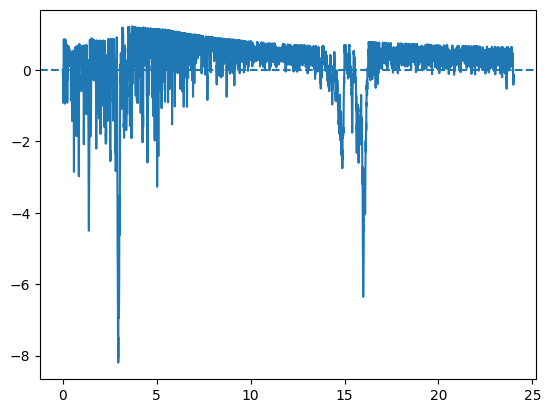

In [196]:
plt.plot(ts, zs - np.cumsum(zs) / np.cumsum(np.ones_like(zs)))
plt.axhline(y=0, ls="--")

In [197]:
y0 = 0
ys = [y0]

for z in (zs)[:-1]:
    y = ys[-1] + z
    ys.append(y)

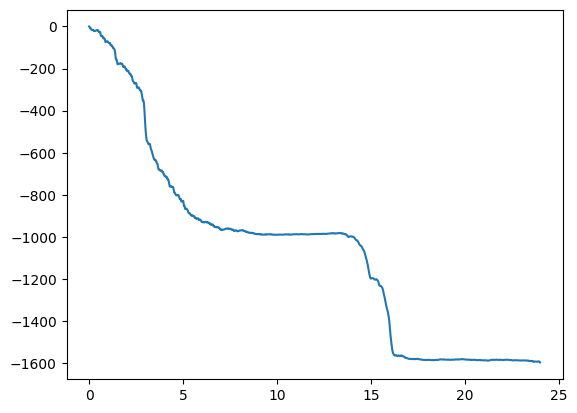

In [198]:
plt.plot(ts, ys)